In [ ]:
#KNN

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#load dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names=["sepal length","sepal width","petal length","petal width","class"]
dataset = pd.read_csv(url,names=col_names)

In [ ]:
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dataset.shape

(150, 5)

In [ ]:
training = dataset.values[:,0:4]
training

In [ ]:
trainingclass = dataset.values[:,-1]
trainingclass

In [ ]:
# distance function

def euclidean_distance(a,b):
  import math
  dis=0
  for i in range(len(a)):
    dis = dis + (a[i]-b[i])**2
  dis = math.sqrt(dis)
  return dis

In [ ]:
unique_class=list(set(trainingclass))
unique_class

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

In [ ]:
# converting labels to numerical labels
for i in range(len(trainingclass)):
  for k in range(len(unique_class)):
    if(trainingclass[i]==unique_class[k]):
      trainingclass[i]=k
print(trainingclass)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
testing = training[0]
testing

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
distance=[]
for i in range(len(training)):
  distance.append([euclidean_distance(training[i],testing),trainingclass[i]])
# print(distance)

In [ ]:
distance

In [ ]:
distance.sort()
distance

In [ ]:
k=11
# distance[:k+1]
identify = [0 for i in range(len(unique_class))]

In [ ]:
identify

[0, 0, 0]

In [ ]:
for i in range(1,k+1):
  # print(distance[i])
  identify[distance[i][1]]+=1
print(identify)

[0, 11, 0]


In [ ]:
print("The predicted class is:",unique_class[identify.index(max(identify))])

The predicted class is: Iris-setosa


K-means Clustoring algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Assignments/kmean.xlsx', header=None)
df1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [ ]:
x = np.array(df1)

In [ ]:
import random
initial_centroid=random.sample(range(0,len(df1)),3)

In [ ]:
initial_centroid

[131, 230, 217]

In [ ]:
centroid=[]
for i in initial_centroid:
  centroid.append(df1.loc[i])
centroid

[0    3.497984
 1    1.100464
 Name: 131, dtype: float64, 0    5.132009
 1    2.198122
 Name: 230, dtype: float64, 0    6.597022
 1    3.070824
 Name: 217, dtype: float64]

In [ ]:
centroids=np.array(centroid)

In [ ]:
centroids

array([[3.49798412, 1.10046402],
       [5.132009  , 2.19812195],
       [6.59702155, 3.07082376]])

In [ ]:
def euclidean_distance(x1,x2):
  return (sum((x1-x2)**2))**0.5

In [ ]:
def find_closest_centroid(centroid,x):
  assigned_cluster=[]
  for i in x:
    distance=[]
    for j in centroid:
      distance.append(euclidean_distance(i,j))
    assigned_cluster.append(np.argmin(distance))
  return assigned_cluster

In [ ]:
get_centroid=find_closest_centroid(centroids,x)

In [ ]:
get_centroid

In [ ]:
def centroid_update(clusters,x):
  new_centroid=[]
  new_df = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):
    c_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    new_mean=c_cluster.mean(axis=0)
    new_centroid.append(new_mean)
  return new_centroid

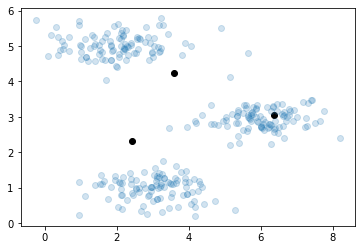

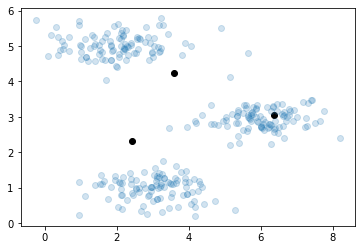

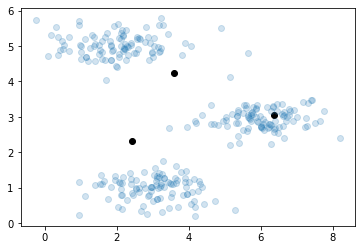

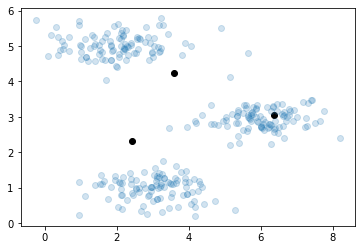

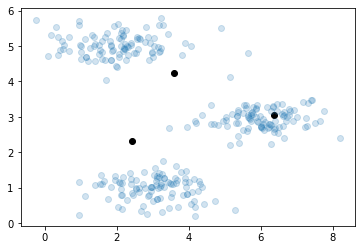

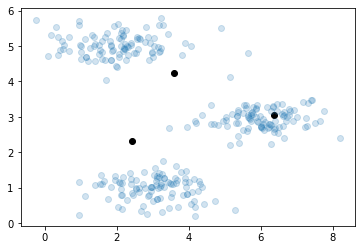

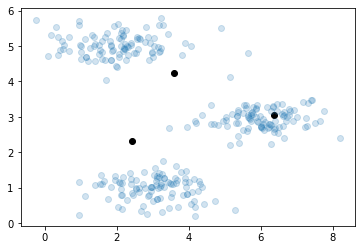

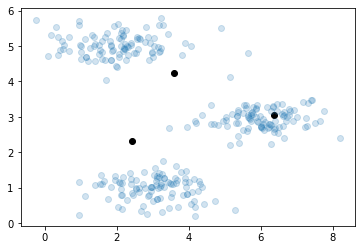

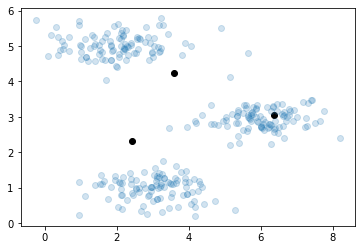

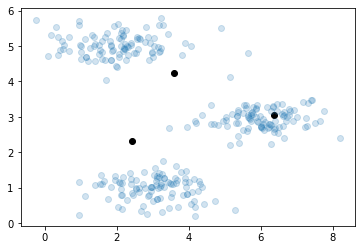

In [ ]:
#training process
for i in range(10):
  get_centroid=find_closest_centroid(centroids,x)
  new_centroids=centroid_update(get_centroid,x)
  #plot the figure
  plt.figure()
  plt.scatter(np.array(new_centroids)[:,0],np.array(new_centroids)[:,1], color="black")
  # plt.figure()
  plt.scatter(x[:,0], x[:,1], alpha=0.2)
  plt.show()